# Linear Regression: From Theory to Implementation

> **"Linear regression is the foundation of machine learning - simple yet powerful."**

## Learning Objectives
- Understand the mathematical foundation of linear regression
- Implement linear regression from scratch using NumPy
- Learn about regularization techniques (Ridge, Lasso)
- Master model evaluation and validation techniques
- Apply linear regression to real-world problems


## 1. Mathematical Foundation

### Simple Linear Regression
**Model**: y = β₀ + β₁x + ε

Where:
- y: dependent variable (target)
- x: independent variable (feature)
- β₀: intercept (bias term)
- β₁: slope (coefficient)
- ε: error term (residuals)

### Multiple Linear Regression
**Model**: y = β₀ + β₁x₁ + β₂x₂ + ... + βₙxₙ + ε

### Matrix Form
**y = Xβ + ε**

Where:
- y: (n×1) target vector
- X: (n×p) feature matrix
- β: (p×1) coefficient vector
- ε: (n×1) error vector


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Set style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
np.random.seed(42)

print("Libraries imported successfully!")


Libraries imported successfully!


## 2. Implementation from Scratch

### Normal Equation
**β = (XᵀX)⁻¹Xᵀy**

This gives us the optimal coefficients that minimize the sum of squared residuals.


In [2]:
class LinearRegressionFromScratch:
    """Linear Regression implementation from scratch using normal equation."""
    
    def __init__(self):
        self.coefficients = None
        self.intercept = None
        
    def fit(self, X, y):
        """
        Fit the linear regression model.
        
        Parameters:
        X: Feature matrix (n_samples, n_features)
        y: Target vector (n_samples,)
        """
        # Add bias term (intercept) to X
        X_with_bias = np.column_stack([np.ones(X.shape[0]), X])
        
        # Calculate coefficients using normal equation
        # β = (X^T X)^(-1) X^T y
        XtX = np.dot(X_with_bias.T, X_with_bias)
        XtX_inv = np.linalg.inv(XtX)
        Xty = np.dot(X_with_bias.T, y)
        
        coefficients = np.dot(XtX_inv, Xty)
        
        # Separate intercept and coefficients
        self.intercept = coefficients[0]
        self.coefficients = coefficients[1:]
        
        return self
    
    def predict(self, X):
        """
        Make predictions using the fitted model.
        
        Parameters:
        X: Feature matrix (n_samples, n_features)
        
        Returns:
        y_pred: Predicted values (n_samples,)
        """
        if self.coefficients is None:
            raise ValueError("Model must be fitted before making predictions")
        
        return self.intercept + np.dot(X, self.coefficients)
    
    def score(self, X, y):
        """
        Calculate R-squared score.
        
        Parameters:
        X: Feature matrix (n_samples, n_features)
        y: True target values (n_samples,)
        
        Returns:
        r2: R-squared score
        """
        y_pred = self.predict(X)
        ss_res = np.sum((y - y_pred) ** 2)
        ss_tot = np.sum((y - np.mean(y)) ** 2)
        r2 = 1 - (ss_res / ss_tot)
        return r2

# Test our implementation
print("Linear Regression class defined successfully!")


Linear Regression class defined successfully!


Testing Linear Regression Implementation:
True coefficients: [ 2.5 -1.3]
True intercept: 3.2

Estimated coefficients: [ 2.59536017 -1.38607105]
Estimated intercept: 3.246

R-squared score: 0.960
Sklearn R-squared: 0.960
Difference: 0.000000


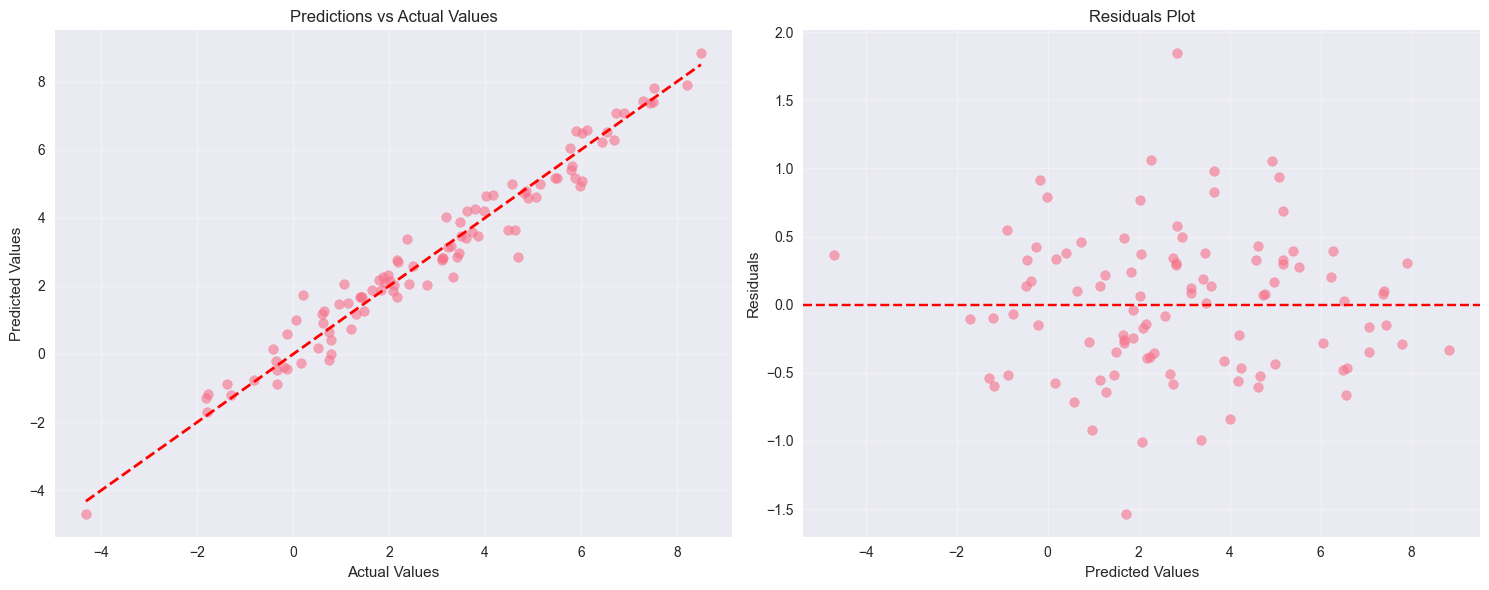

In [3]:
# Test our implementation
print("Testing Linear Regression Implementation:")
print("=" * 50)

# Generate sample data
np.random.seed(42)
X = np.random.randn(100, 2)  # 100 samples, 2 features
true_coeffs = np.array([2.5, -1.3])
true_intercept = 3.2
y = true_intercept + X @ true_coeffs + np.random.normal(0, 0.5, 100)

print(f"True coefficients: {true_coeffs}")
print(f"True intercept: {true_intercept}")

# Fit our model
model = LinearRegressionFromScratch()
model.fit(X, y)

print(f"\nEstimated coefficients: {model.coefficients}")
print(f"Estimated intercept: {model.intercept:.3f}")

# Make predictions
y_pred = model.predict(X)
r2_score = model.score(X, y)

print(f"\nR-squared score: {r2_score:.3f}")

# Compare with sklearn
from sklearn.linear_model import LinearRegression as SklearnLinearRegression
sklearn_model = SklearnLinearRegression()
sklearn_model.fit(X, y)
sklearn_r2 = sklearn_model.score(X, y)

print(f"Sklearn R-squared: {sklearn_r2:.3f}")
print(f"Difference: {abs(r2_score - sklearn_r2):.6f}")

# Visualize results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Scatter plot of predictions vs actual
ax1.scatter(y, y_pred, alpha=0.6)
ax1.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
ax1.set_xlabel('Actual Values')
ax1.set_ylabel('Predicted Values')
ax1.set_title('Predictions vs Actual Values')
ax1.grid(True, alpha=0.3)

# Residuals plot
residuals = y - y_pred
ax2.scatter(y_pred, residuals, alpha=0.6)
ax2.axhline(y=0, color='r', linestyle='--')
ax2.set_xlabel('Predicted Values')
ax2.set_ylabel('Residuals')
ax2.set_title('Residuals Plot')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## 3. Regularization Techniques

### Ridge Regression (L2 Regularization)
Adds a penalty term proportional to the sum of squared coefficients.

**Objective Function:**
$J(\beta) = \sum_{i=1}^{n}(y_i - \hat{y}_i)^2 + \alpha\sum_{j=1}^{p}\beta_j^2$

### Lasso Regression (L1 Regularization)
Adds a penalty term proportional to the sum of absolute coefficients.

**Objective Function:**
$J(\beta) = \sum_{i=1}^{n}(y_i - \hat{y}_i)^2 + \alpha\sum_{j=1}^{p}|\beta_j|$


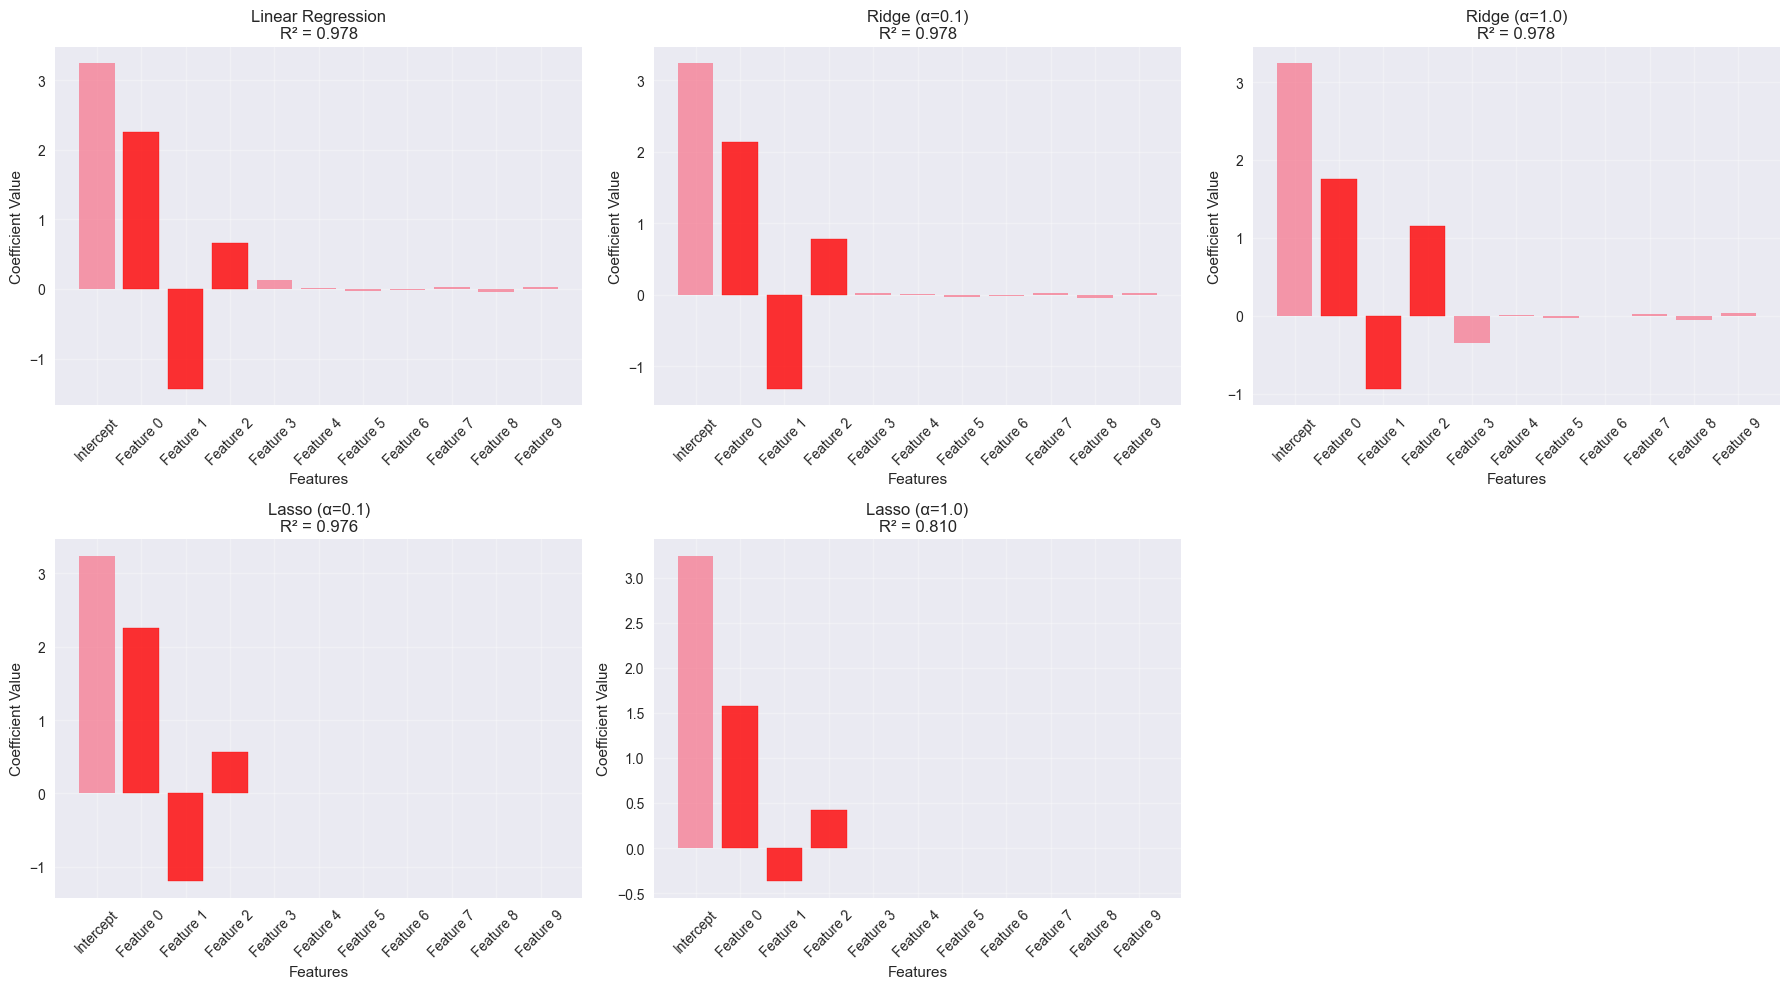


Model Comparison:
Model                R² Score   L1 Norm    L2 Norm   
--------------------------------------------------------------------------------
Linear Regression    0.978      4.638      2.758     
Ridge (α=0.1)        0.978      4.410      2.634     
Ridge (α=1.0)        0.978      4.362      2.331     
Lasso (α=0.1)        0.976      4.019      2.617     
Lasso (α=1.0)        0.810      2.359      1.666     

True coefficients: [ 2.5 -1.3  0.8  0.   0.   0.   0.   0.   0.   0. ]
Note: L1 norm encourages sparsity (Lasso), L2 norm encourages small coefficients (Ridge)


In [4]:
# Compare different regularization techniques
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler

# Generate data with multicollinearity
np.random.seed(42)
n_samples, n_features = 100, 10
X = np.random.randn(n_samples, n_features)

# Create multicollinear features
X[:, 2] = X[:, 0] + 0.1 * np.random.randn(n_samples)
X[:, 3] = X[:, 1] + 0.1 * np.random.randn(n_samples)

# True coefficients (only first 3 are non-zero)
true_coeffs = np.zeros(n_features)
true_coeffs[:3] = [2.5, -1.3, 0.8]
true_intercept = 3.2
y = true_intercept + X @ true_coeffs + np.random.normal(0, 0.5, n_samples)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit different models
models = {
    'Linear Regression': LinearRegressionFromScratch(),
    'Ridge (α=0.1)': Ridge(alpha=0.1),
    'Ridge (α=1.0)': Ridge(alpha=1.0),
    'Lasso (α=0.1)': Lasso(alpha=0.1),
    'Lasso (α=1.0)': Lasso(alpha=1.0)
}

results = {}
for name, model in models.items():
    if name == 'Linear Regression':
        model.fit(X_scaled, y)
        coeffs = np.concatenate([[model.intercept], model.coefficients])
        r2 = model.score(X_scaled, y)
    else:
        model.fit(X_scaled, y)
        coeffs = np.concatenate([[model.intercept_], model.coef_])
        r2 = model.score(X_scaled, y)
    
    results[name] = {
        'coefficients': coeffs,
        'r2_score': r2
    }

# Visualize coefficient comparison
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

feature_names = ['Intercept'] + [f'Feature {i}' for i in range(n_features)]
x_pos = np.arange(len(feature_names))

for i, (name, result) in enumerate(results.items()):
    if i < 6:  # Only plot first 6 models
        ax = axes[i]
        coeffs = result['coefficients']
        r2 = result['r2_score']
        
        bars = ax.bar(x_pos, coeffs, alpha=0.7)
        ax.set_title(f'{name}\nR² = {r2:.3f}')
        ax.set_xlabel('Features')
        ax.set_ylabel('Coefficient Value')
        ax.set_xticks(x_pos)
        ax.set_xticklabels(feature_names, rotation=45)
        ax.grid(True, alpha=0.3)
        
        # Highlight true non-zero coefficients
        for j in range(1, 4):  # First 3 features are non-zero
            bars[j].set_color('red')
            bars[j].set_alpha(0.8)

# Remove empty subplot
axes[5].remove()

plt.tight_layout()
plt.show()

# Print comparison table
print("\nModel Comparison:")
print("=" * 80)
print(f"{'Model':<20} {'R² Score':<10} {'L1 Norm':<10} {'L2 Norm':<10}")
print("-" * 80)

for name, result in results.items():
    coeffs = result['coefficients'][1:]  # Exclude intercept
    l1_norm = np.sum(np.abs(coeffs))
    l2_norm = np.sqrt(np.sum(coeffs**2))
    r2 = result['r2_score']
    
    print(f"{name:<20} {r2:<10.3f} {l1_norm:<10.3f} {l2_norm:<10.3f}")

print(f"\nTrue coefficients: {true_coeffs}")
print("Note: L1 norm encourages sparsity (Lasso), L2 norm encourages small coefficients (Ridge)")
